<a href="https://colab.research.google.com/github/Sunnn-y/NaturalLanguageProcessing/blob/main/20231019_%EA%B0%90%EC%A0%95%EB%B6%84%EC%84%9D_%EC%8B%A4%EC%8A%B5(Naive_Bayse%2C_RNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayse 감정분석

- 참고<br/>
<img src="https://drive.google.com/uc?id=1I7cu4UoWZpDwXgkym1SvijVewoVPuFZr" height = 300 width = 500>
<img src="https://drive.google.com/uc?id=1q-DdZoqt0fTpb7mpoFnd6xijM1pRLY34" height = 500 width = 500>


## 실습 1
- "happy weekend" 라는 단어가 포함된 문장이 긍정일 확률과 부정일 확률은 각각 얼마일까요?

### 모델링 날코딩 (진행중)

In [ ]:
text = [("I love you", "P"),
        ("love happy weekend", "P"),
        ("bore work job", "N"),
        ("I hate you", "N"),
        ("bore weekend", "N"),
        ("happy together", "P")]

In [ ]:
word = []
for doc in text:
  word.append(doc[0].split(' '))

word

[['I', 'love', 'you'],
 ['love', 'happy', 'weekend'],
 ['bore', 'work', 'job'],
 ['I', 'hate', 'you'],
 ['bore', 'weekend'],
 ['happy', 'together']]

In [ ]:
# 고유 토큰 추출 후 인덱스 붙이기
docu = set() # 중복값 제거를 위해 빈 세트 설정
doc_ls = []
for doc in text:
  doc_ls.append(doc[0])

for i in range(len(doc_ls)):
  token = doc_ls[i].split(' ')
  for k in token:
    docu.add(k)

docu

{'I',
 'bore',
 'happy',
 'hate',
 'job',
 'love',
 'together',
 'weekend',
 'work',
 'you'}

In [ ]:
docu = list(docu)

In [ ]:
# 여기서부터 다시 하기!!
count_token = []
for doc in text:
  # print(doc[1])
  if doc[1] == "P":
#     for i in range(len(docu)):
#       count_token.append(doc[0].count(docu[i]))
# count_token

## 실습 1 - 다른 풀이(sklearn 패키지 사용)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

text = [("I love you", "P"),
        ("love happy weekend", "P"),
        ("bore work job", "N"),
        ("I hate you", "N"),
        ("bore weekend", "N"),
        ("happy together", "P")]

In [ ]:
X_train = [t[0] for t in text]
Y_train = [t[1] for t in text]
X_train

['I love you',
 'love happy weekend',
 'bore work job',
 'I hate you',
 'bore weekend',
 'happy together']

In [ ]:
Y_train

['P', 'P', 'N', 'N', 'N', 'P']

- sklearn CountVectorizer<br/>
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html<br/>
문서 집합에서 단어 토큰을 생성하고 각 단어수를 세어 BOW 인코딩 벡터를 만든다

In [ ]:
count_vect = CountVectorizer() # CountVectorizer 선언
X_train_counts = count_vect.fit_transform(X_train) # fit : 학습, transform : 적용  # 토큰화 안 해도 모듈이 알아서 공백으로 토큰화해줌
model = MultinomialNB() # MultinomialNB 선언
model.fit(X_train_counts, Y_train)

MultinomialNB()

In [ ]:
# label 예측
model.predict(count_vect.transform(["happy weekend"]))

array(['P'], dtype='<U1')

In [ ]:
# label 예측의 확률값
model.predict_proba(count_vect.transform(["happy weekend"]))
# y label은 설정 안하면 알파벳 순으로 인덱스 매겨짐(N -> P순이니까 N=0, P=1)
# 그래서 보통 전처리 단계에서 y label을 숫자로 다 바꿔준다

array([[0.25, 0.75]])

## 실습 2 (DTM 사용)
- 네이버 영화 리뷰데이터로 감정 분석

In [ ]:
# 구글 드라이브 마운트(연결)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/핀테크 데이터분석/자연어 처리/review.csv',
                 sep = '\t') # tap을 기준으로 파일 저장해서 읽을 때도 tap 옵션 설정해줘야 함
# df = df[:100]
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


### 토큰화 및 데이터 전처리

In [ ]:
# !pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 34.4 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Okt
tokenizer = Okt()

df['morphs'] = None
for i, row in df.iterrows():
  df['morphs'][i] = ' '.join(tokenizer.morphs(row['document']))

<ipython-input-94-eab88834c7d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['morphs'][i] = ' '.join(tokenizer.morphs(row['document']))


In [ ]:
df.head()

,id,document,label,morphs
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,아 더빙 .. 진짜 짜증나네요 목소리
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,흠 ... 포스터 보고 초딩 영화 줄 .... 오버 연기 조차 가볍지 않구나
2,10265843,너무재밓었다그래서보는것을추천한다,0,너 무재 밓었 다그 래서 보는것을 추천 한 다
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소 이야기 구먼 .. 솔직히 재미 는 없다 .. 평점 조정
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이 몬페 그 의 익살스런 연기 가 돋보였던 영화 ! 스파이더맨 에서 늙어 보이기만...


In [ ]:
import re
# 한글을 제외한 다른 문자 모두 제거
remove_except_ko = re.compile(r"[^가-힣ㄱ-하-ㅣ\\s]")

def preprocess_remove(text):
  text = re.sub(remove_except_ko,' ',text).strip()
  return text

df['morphs'] = df['morphs'].map(lambda x : preprocess_remove(x))
df.head()

,id,document,label,morphs
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,아 더빙 진짜 짜증나네요 목소리
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,흠 포스터 보고 초딩 영화 줄 오버 연기 조차 가볍지 않구나
2,10265843,너무재밓었다그래서보는것을추천한다,0,너 무재 밓었 다그 래서 보는것을 추천 한 다
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소 이야기 구먼 솔직히 재미 는 없다 평점 조정
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이 몬페 그 의 익살스런 연기 가 돋보였던 영화 스파이더맨 에서 늙어 보이기만...


In [ ]:
# 불용어 처리
stop_word = ['포스터', '저작권자', '한경', '닷컴', '뉴스룸', '홈페이지', '바로', '네이버', '구독', '채널', '세요', '제공','께서', '라고', '입니다', '습니다', '한다', '에서', '이다', '에게', '으로', '이랑', '까지', '부터', '하다', '한데', '통해', '위해', '때문' ]

def preprocess(text):
  text = text.split()
  text = [i for i in text if len(i)>1]
  text = [i for i in text if i not in stop_word]
  return text

In [ ]:
# 토큰화 + 토큰리스트 생성
def make_tokens(df):
  df['tokens'] = None
  for i, row in df.iterrows():
    if i%1000==0:
      print(i,'/',len(df))
    token = preprocess(df['morphs'][i])
    df['tokens'][i] = ' '.join(token)
  return df

df = make_tokens(df)

0 / 10000


<ipython-input-98-86dc58720036>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'][i] = ' '.join(token)


1000 / 10000
2000 / 10000
3000 / 10000
4000 / 10000
5000 / 10000
6000 / 10000
7000 / 10000
8000 / 10000
9000 / 10000


In [ ]:
df.head()

,id,document,label,morphs,tokens
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,아 더빙 진짜 짜증나네요 목소리,더빙 진짜 짜증나네요 목소리
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,흠 포스터 보고 초딩 영화 줄 오버 연기 조차 가볍지 않구나,보고 초딩 영화 오버 연기 조차 가볍지 않구나
2,10265843,너무재밓었다그래서보는것을추천한다,0,너 무재 밓었 다그 래서 보는것을 추천 한 다,무재 밓었 다그 래서 보는것을 추천
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소 이야기 구먼 솔직히 재미 는 없다 평점 조정,교도소 이야기 구먼 솔직히 재미 없다 평점 조정
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이 몬페 그 의 익살스런 연기 가 돋보였던 영화 스파이더맨 에서 늙어 보이기만...,사이 몬페 익살스런 연기 돋보였던 영화 스파이더맨 늙어 보이기만 했던 커스틴 던스트...


### 감정 분석 모델링

In [ ]:
x = df.iloc[:, -1]
y = df.iloc[:, 2]

In [ ]:
# 훈련데이터, 테스트데이터 분리
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                                                    random_state = 2) # test_size 의 디폴트값은 0.25

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
# DTM - Document Term Matrix 사용
dtmvector = CountVectorizer()
dtmvector.fit(x_train)
x_train_dtm = dtmvector.transform(x_train)
print(x_train_dtm.shape)

(8000, 17339)


In [ ]:
model = MultinomialNB()
model.fit(x_train_dtm, y_train)

MultinomialNB()

In [ ]:
# 테스트 데이터 DTM 형태로 변환
x_test_dtm = dtmvector.transform(x_test)
print(x_test_dtm.shape)

(2000, 17339)


### 정확도(acc), f1 score 구하기

In [ ]:
# 정확도(accuracy) 구하기
predicted = model.predict(x_test_dtm) #테스트 데이터에 대한 예측
print("정확도: %.4f" % accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7880


In [ ]:
# f1 score 구하기
from sklearn.metrics import f1_score
print(f1_score(y_test, predicted, average='macro'))

0.7878778176229508


### label 예측

In [ ]:
# label 예측
model.predict(dtmvector.transform(["올해 본 영화 중 가장 최고야"])) # 0=부정, 1=긍정

array([1])

In [ ]:
# label 예측의 확률값
model.predict_proba(dtmvector.transform(["올해 본 영화 중 가장 최고야"]))

array([[0.18416898, 0.81583102]])

In [ ]:
## 정확도가 너무 낮아서 모델링 수정 필요
## 맞춤법 교정, 표제어 추출 등 다양한 방법으로 시도해보기

## 실습 2 - 다른 풀이 (Tfidf 사용)

- 테스트 데이터 예측(숫자로 변환해줘야 하니까 count_vect.transform 사용)

In [188]:
# 구글 드라이브 마운트(연결)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [189]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/핀테크 데이터분석/자연어 처리/review.csv',
                 sep = '\t') # tap을 기준으로 파일 저장해서 읽을 때도 tap 옵션 설정해줘야 함
# df = df[:100]
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


### 감정분석 모델링

In [191]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df['document'], df['label'], random_state=0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [192]:
len(X_test)

2500

### 정확도(acc), f1 score 구하기

In [193]:
# 예측값
y_predict = model.predict(count_vect.transform(X_test))
y_predict

array([1, 1, 0, ..., 0, 0, 1])

In [194]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict, target_names=['부정(0)', '긍정(1)']))

# macro : 단순평균
# weighted : 각 클래스에 속하는 표본의 개수로 가중평균
# accuracy : 정확도. 전체 학습데이터의 개수에서 각 클래스에서 자신의 클래스를 정확하게 맞춘 개수의 비율

              precision    recall  f1-score   support

       부정(0)       0.76      0.76      0.76      1248
       긍정(1)       0.76      0.76      0.76      1252

    accuracy                           0.76      2500
   macro avg       0.76      0.76      0.76      2500
weighted avg       0.76      0.76      0.76      2500



### label 예측

In [198]:
test = "올해 본 영화 중 가장 최고야"
print(model.predict((count_vect.transform([test])))) # 0=부정, 1=긍정
print(model.predict_proba((count_vect.transform([test]))))

[1]
[[0.15576281 0.84423719]]


# RNN 감정 분석

## 실습 2
- 네이버 영화 리뷰데이터로 감정 분석

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/핀테크 데이터분석/자연어 처리/review.csv',
                 sep = '\t')
# df = df[:100]
df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


### 토큰화 및 데이터 전처리

In [ ]:
from konlpy.tag import Okt
tokenizer = Okt()

df['morphs'] = None
for i, row in df.iterrows():
  df['morphs'][i] = ' '.join(tokenizer.morphs(row['document']))

<ipython-input-116-eab88834c7d3>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['morphs'][i] = ' '.join(tokenizer.morphs(row['document']))


In [ ]:
df.head()

,id,document,label,morphs
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,아 더빙 .. 진짜 짜증나네요 목소리
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,흠 ... 포스터 보고 초딩 영화 줄 .... 오버 연기 조차 가볍지 않구나
2,10265843,너무재밓었다그래서보는것을추천한다,0,너 무재 밓었 다그 래서 보는것을 추천 한 다
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소 이야기 구먼 .. 솔직히 재미 는 없다 .. 평점 조정
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이 몬페 그 의 익살스런 연기 가 돋보였던 영화 ! 스파이더맨 에서 늙어 보이기만...


In [ ]:
import re
# 한글을 제외한 다른 문자 모두 제거
remove_except_ko = re.compile(r"[^가-힣ㄱ-하-ㅣ\\s]")

def preprocess_remove(text):
  text = re.sub(remove_except_ko,' ',text).strip()
  return text

df['morphs'] = df['morphs'].map(lambda x : preprocess_remove(x))
df.head()

,id,document,label,morphs
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,아 더빙 진짜 짜증나네요 목소리
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,흠 포스터 보고 초딩 영화 줄 오버 연기 조차 가볍지 않구나
2,10265843,너무재밓었다그래서보는것을추천한다,0,너 무재 밓었 다그 래서 보는것을 추천 한 다
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소 이야기 구먼 솔직히 재미 는 없다 평점 조정
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이 몬페 그 의 익살스런 연기 가 돋보였던 영화 스파이더맨 에서 늙어 보이기만...


In [ ]:
# 불용어 처리
stop_word = ['포스터', '저작권자', '한경', '닷컴', '뉴스룸', '홈페이지', '바로', '네이버', '구독', '채널', '세요', '제공','께서', '라고', '입니다', '습니다', '한다', '에서', '이다', '에게', '으로', '이랑', '까지', '부터', '하다', '한데', '통해', '위해', '때문' ]

def preprocess(text):
  text = text.split()
  text = [i for i in text if len(i)>1]
  text = [i for i in text if i not in stop_word]
  return text

In [ ]:
# 토큰화 + 토큰리스트 생성
def make_tokens(df):
  df['tokens'] = None
  for i, row in df.iterrows():
    if i%1000==0:
      print(i,'/',len(df))
    token = preprocess(df['morphs'][i])
    df['tokens'][i] = ' '.join(token)
  return df

df = make_tokens(df)

0 / 10000


<ipython-input-120-86dc58720036>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'][i] = ' '.join(token)


1000 / 10000
2000 / 10000
3000 / 10000
4000 / 10000
5000 / 10000
6000 / 10000
7000 / 10000
8000 / 10000
9000 / 10000


In [ ]:
df.head()

,id,document,label,morphs,tokens
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0,아 더빙 진짜 짜증나네요 목소리,더빙 진짜 짜증나네요 목소리
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1,흠 포스터 보고 초딩 영화 줄 오버 연기 조차 가볍지 않구나,보고 초딩 영화 오버 연기 조차 가볍지 않구나
2,10265843,너무재밓었다그래서보는것을추천한다,0,너 무재 밓었 다그 래서 보는것을 추천 한 다,무재 밓었 다그 래서 보는것을 추천
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0,교도소 이야기 구먼 솔직히 재미 는 없다 평점 조정,교도소 이야기 구먼 솔직히 재미 없다 평점 조정
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1,사이 몬페 그 의 익살스런 연기 가 돋보였던 영화 스파이더맨 에서 늙어 보이기만...,사이 몬페 익살스런 연기 돋보였던 영화 스파이더맨 늙어 보이기만 했던 커스틴 던스트...


### 데이터 인코딩

In [156]:
# 유니크한 토큰 개수 확인
token_list = []
for i in df['tokens']:
  token_list.extend(i.split(' '))
  # break

len(token_list)

83564

In [157]:
x = df.iloc[:, -1]
y = df.iloc[:, 2]

In [158]:
print(tokenizer.word_index)

{'영화': 1, '정말': 2, '너무': 3, '진짜': 4, '연기': 5, '평점': 6, '최고': 7, '스토리': 8, '하고': 9, '이런': 10, '사람': 11, '드라마': 12, '보고': 13, '감동': 14, '하는': 15, '생각': 16, 'ㅋㅋ': 17, '감독': 18, '그냥': 19, '시간': 20, '내용': 21, '재미': 22, '배우': 23, '작품': 24, '보다': 25, '없는': 26, '하나': 27, '쓰레기': 28, '사랑': 29, '없다': 30, '이건': 31, '마지막': 32, '정도': 33, '같은': 34, '있는': 35, '이렇게': 36, '연출': 37, '봤는데': 38, '액션': 39, '주인공': 40, '다시': 41, '장면': 42, '좋은': 43, '느낌': 44, 'ㅋㅋㅋ': 45, '지금': 46, '없고': 47, '보는': 48, '역시': 49, '이야기': 50, '처음': 51, '최악': 52, '완전': 53, '명작': 54, 'ㅡㅡ': 55, '인데': 56, '별로': 57, 'ㅠㅠ': 58, '봐도': 59, '그리고': 60, '해서': 61, '같다': 62, '이나': 63, '많이': 64, '보면': 65, '이해': 66, '이영화': 67, '결말': 68, '재밌게': 69, '아깝다': 70, '인생': 71, '한번': 72, '가슴': 73, '소재': 74, '무슨': 75, '이고': 76, '라는': 77, '마음': 78, '여자': 79, '매력': 80, '남자': 81, '가장': 82, '기억': 83, '보기': 84, '모든': 85, '지만': 86, '없이': 87, 'ㅎㅎ': 88, '인가': 89, '하지만': 90, '수준': 91, '인간': 92, '전개': 93, '되는': 94, '현실': 95, '캐릭터': 96, '하지': 97, '실망': 98, '반전': 99, '전혀

In [160]:
# 등장 빈도수 3회 미만인 토큰이 전체에서 얼마나 비중을 차지하는지 확인
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items(): # word_counts : 단어의 빈도수를 계산해주는 함수 # items() : kev값과 value값을 쌍으로 받음
  total_freq += value

  # 단어의 등장 빈도수가 threshold보다 작으면
  if(value < threshold):
    rare_cnt += 1
    rare_freq += value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 17340
등장 빈도가 2번 이하인 희귀 단어의 수: 13455
단어 집합에서 희귀 단어의 비율: 77.59515570934255
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 23.594787750917494


In [144]:
vocab_size = total_cnt - rare_cnt + 1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 3886


In [170]:
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,
                                                    random_state = 2) # test_size 의 디폴트값은 0.25from sklearn.model_selection import train_test_split

tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(x_train)
x_train = tokenizer.texts_to_sequences(x_train)
x_test = tokenizer.texts_to_sequences(x_test)

In [171]:
print(x_train[:3])

[[5, 1317, 3, 62, 23, 607, 128, 101, 21, 3, 765, 172, 46, 148, 12, 62], [649, 128, 26, 96, 1318, 26, 8, 2210, 1527, 202, 221, 1319, 2804, 2805, 2806, 1320, 250, 1321, 265, 1322, 2211], [396, 1026, 2807, 173, 2808, 564, 1027, 35, 1]]


### 패딩(padding)

리뷰의 최대 길이 : 33
리뷰의 평균 길이 : 6.427875


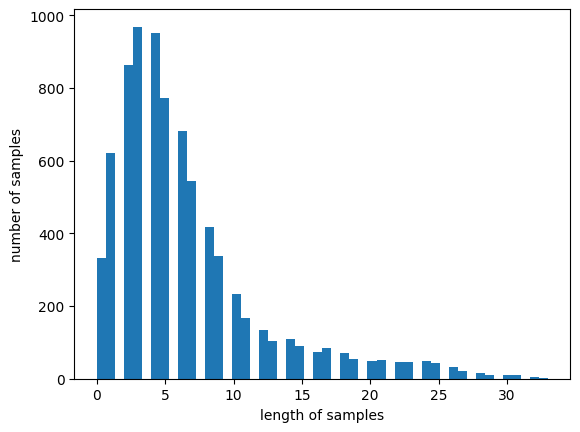

In [172]:
import matplotlib.pyplot as plt

print('리뷰의 최대 길이 :',max(len(review) for review in x_train))
print('리뷰의 평균 길이 :',sum(map(len, x_train))/len(x_train))
plt.hist([len(review) for review in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
# 그래프 왜이래..??

In [176]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [177]:
max_len = 30
below_threshold_len(max_len, x_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 99.77829942618675


In [180]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

### 감정분석 모델링

In [181]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4) # 과적합 방지를 위해 조기 중단
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15
96/96 [==============================] - ETA: 0s - loss: 0.6934 - acc: 0.4995
Epoch 1: val_acc improved from -inf to 0.49870, saving model to best_model.h5
96/96 [==============================] - 14s 106ms/step - loss: 0.6934 - acc: 0.4995 - val_loss: 0.6936 - val_acc: 0.4987
Epoch 2/15
 2/96 [..............................] - ETA: 5s - loss: 0.6891 - acc: 0.5703

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - ETA: 0s - loss: 0.6915 - acc: 0.5326
Epoch 2: val_acc did not improve from 0.49870
96/96 [==============================] - 10s 101ms/step - loss: 0.6915 - acc: 0.5326 - val_loss: 0.6944 - val_acc: 0.4817
Epoch 3/15
96/96 [==============================] - ETA: 0s - loss: 0.6845 - acc: 0.5672
Epoch 3: val_acc did not improve from 0.49870
96/96 [==============================] - 8s 80ms/step - loss: 0.6845 - acc: 0.5672 - val_loss: 0.6997 - val_acc: 0.4941
Epoch 4/15
96/96 [==============================] - ETA: 0s - loss: 0.6619 - acc: 0.6130
Epoch 4: val_acc did not improve from 0.49870
96/96 [==============================] - 9s 99ms/step - loss: 0.6619 - acc: 0.6130 - val_loss: 0.7287 - val_acc: 0.4804
Epoch 5/15
96/96 [==============================] - ETA: 0s - loss: 0.6139 - acc: 0.6731
Epoch 5: val_acc did not improve from 0.49870
96/96 [==============================] - 7s 78ms/step - loss: 0.6139 - acc: 0.6731 - val_loss: 0.7820 - val_a

### 정확도(acc), f1 score 구하기

In [185]:
model.evaluate(x_test, y_test)

63/63 [==============================] - 3s 41ms/step - loss: 0.7542 - acc: 0.4965


[0.7541602253913879, 0.4964999854564667]

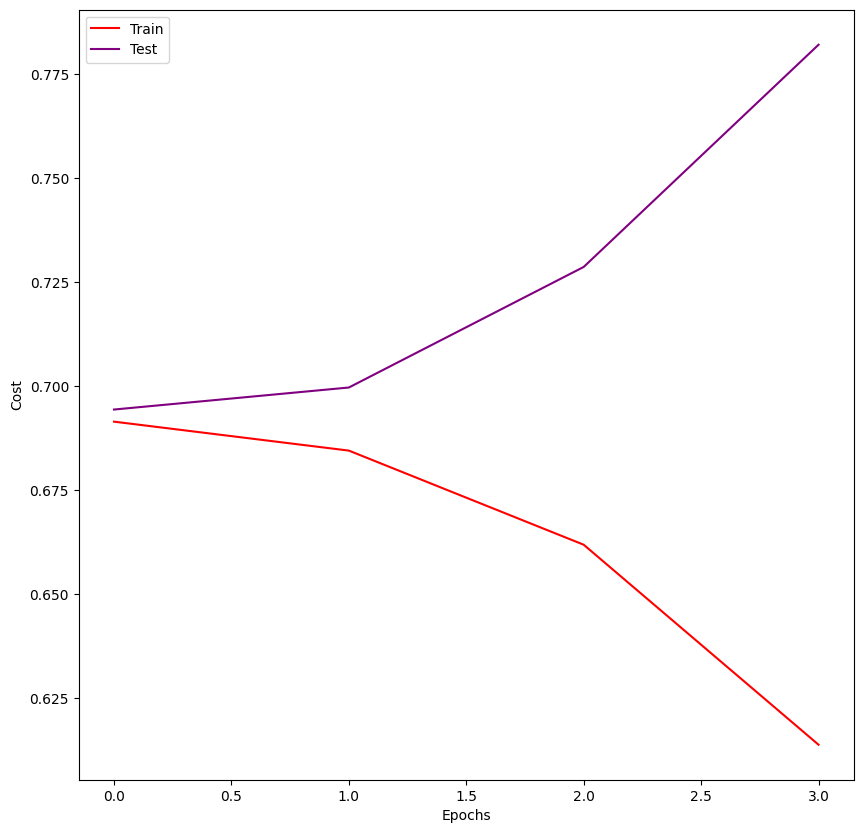

In [187]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'][1:], label='Train', color='red')
plt.plot(history.history['val_loss'][1:], label='Test', color='purple')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [ ]:
### 그래프 왜이래!!!!!!!!!!!!
### 나중에 모델링 뜯어 고치기